# Functional Data Analysis with Monovariate Prediction
This notebook demonstrates the process of conducting a functional data analysis with a focus on monovariate prediction. It outlines the goal of the notebook, the dataset being used, and the main steps that will be taken.

## Setting Up the Environment
The following cells set up the environment by loading necessary libraries and defining the path to the simulation file.

In [1]:
# @__DIR__ is the directory of the current file
# We need to go up to the parent directory to find the project root
project_root = dirname(dirname(@__DIR__))


include(joinpath(project_root, "setup", "init_env.jl"))
set_R_lib_path(project_root)
using Plots


  Activating project at `c:\Users\User\Documents\repos\TESI\tesi_data\progetto_s_on_f.md\b_spline\functional-data-regression-mip`


## Load Data and Run R Simulation
Here we load the data required for the simulation and run the R simulation script to prepare the data for analysis.

**NOTICE** -> The seed should be the same for both the training and the test datasets, otherwise the data distribution will be different. 
This is very important specifically in the "Paper simulation" where the predictors shape depends on the coefficients a1,...f3 extracted from Uniform and Normal distributions.  

In [2]:

simulation_name = "paper"
simulation_settings_file = "default"

measurements = 100
basis_functions = 4
params_train = (
    observations = 500,
    measurements = measurements,
    basis_functions = basis_functions,
    noise_snr = [true,true],
    seed = 1
)

params_test = (
    observations = 300,
    measurements = measurements,
    basis_functions = basis_functions,
    noise_snr = [100,100],
    seed = 300
)



(observations = 300, measurements = 100, basis_functions = 4, noise_snr = [100, 100], seed = 300)

Load Data

In [3]:
include(joinpath(project_root, "src", "simulation.jl"))

# Note: Use ... to unpack NamedTuple into keyword arguments
output = load_simulation_data(simulation_name, simulation_settings_file, project_root; params_train...)

# output_test = load_simulation_data(simulation_name, simulation_settings_file, project_root; params_test...)


# Grab the outputs from the R script

predictors = Int(output[:predictors])
true_predictors = output[:true_predictors]
intercept = output[:intercept]
observations = Int(output[:observations])

# betas and basis
beta_matrix  = output[:B]
basis_objs   = output[:basis_objs]
basis_values = output[:basis_values]
time_domains = output[:time_domains]

# matrixes 
U = output[:U]
X = output[:X]
Y = output[:Y]
Z = output[:Z]
J = output[:J]
W = output[:W]


# X_test = output_test[:X]
# Y_test = output_test[:Y]
# Z_test = output_test[:Z]
# J_test = output_test[:J]
# W_test = output_test[:W];
X


┌ Warning: RCall.jl: here() starts at C:/Users/User/Documents/repos/TESI/tesi_data/progetto_s_on_f.md/b_spline/functional-data-regression-mip
└ @ RCall C:\Users\User\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "predictors: 6"
[1] "observations: 500"
[1] "measurements: 100"
[1] "basis_functions: 4"
[1] "intercept: 0"


base64 binary data: G1szM20bWzFt4pSMIBtbMjJtG1szOW0bWzMzbRtbMW1XYXJuaW5nOiAbWzIybRtbMzltUkNhbGwuamw6IENhcmljYW1lbnRvIGRlbCBwYWNjaGV0dG8gcmljaGllc3RvOiBzcGxpbmVzChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IGZkcwobWzMzbRtbMW3ilIIgG1syMm0bWzM5bUNhcmljYW1lbnRvIGRlbCBwYWNjaGV0dG8gcmljaGllc3RvOiByYWluYm93ChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IHBjYVBQChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IFJDdXJsChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IGRlU29sdmUKG1szM20bWzFt4pSCIBtbMjJtG1szOW0KG1szM20bWzFt4pSCIBtbMjJtG1szOW1DYXJpY2FtZW50byBwYWNjaGV0dG86ICdmZGEnChtbMzNtG1sxbeKUgiAbWzIybRtbMzltChtbMzNtG1sxbeKUgiAbWzIybRtbMzltSWwgc2VndWVudGUgb2dnZXR0byDoIG1hc2NoZXJhdG8gZGEgJ3BhY2thZ2U6Z3JhcGhpY3MnOgobWzMzbRtbMW3ilIIgG1syMm0bWzM5bQobWzMzbRtbMW3ilIIgG1syMm0bWzM5bSAgICBtYXRwbG90ChtbMzNtG1sxbeKUgiAbWzIybRtbMzltChtbMzNtG1sxbeKUlCAbWzIybRtbMzltG1s5MG1AIFJDYWxs

[1] 369.3474
[1] 1434.892


500×6×100 Array{Float64, 3}:
[:, :, 1] =
 6.33527   0.95511      9.73952  -0.796983    -8.24639  10.0205
 9.49719  -0.507557     7.40424   0.928004    -5.3831    5.48803
 7.53772   1.08675      5.83237   0.512321    -6.03042  12.8611
 8.25595  -0.371231     7.11644  -0.874462    -7.56855  10.4049
 4.2648    0.9086       7.3596    0.721924    -6.43598   7.25076
 6.99718  -0.0798684    7.33076  -0.871439    -7.57367   9.20503
 7.4336   -0.376326     6.43923   0.60621     -7.30586  13.882
 7.18695  -1.10254      6.45588   0.402551    -7.63873   8.04591
 7.68562  -0.124421     9.36114   0.681765    -7.06893   7.42599
 5.09578   0.267456     9.27067  -0.0553425   -7.32781  13.5556
 9.05938  -1.1842      10.4414   -0.628323    -6.22743  12.3613
 9.47791  -0.790388     5.93508   0.00549348  -6.35343   8.27763
 5.63536   1.22861      6.0684   -0.35517     -6.89923   3.8874
 ⋮                                                       ⋮
 8.6343   -1.50419      6.67572  -0.361278    -6.98345  19.0061

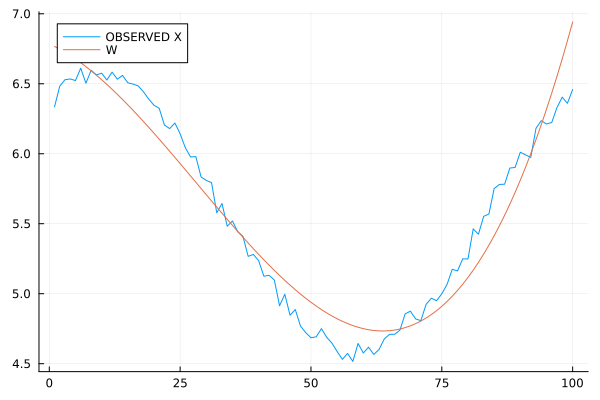

In [4]:
#  plot(U[1,1,:], label="TRUE U", legend=:topleft)
plot(X[1,1,:], label="OBSERVED X", legend=:topleft)
plot!(basis_values[1,:,:] * W[1, 1, :], label="W", legend=:topleft)


## Model Execution
Run the predictive model using the prepared data.

In [5]:
function ols_solution(Y, Z)
    # Y: Vector of observed response variables
    # Z: Matrix of predictor variables
    
    _obs, _predictors, _basi= size(Z)
    # Permute dimensions so that K becomes the second dimension
    Z_permuted = permutedims(Z, [1, 3, 2])
    # Reshape the permuted array into a 2D matrix
    Z_reshaped = reshape(Z_permuted, _obs, _predictors * _basi)

    beta =  (Z_reshaped' * Z_reshaped) \ (Z_reshaped' * Y) # othwerise (Z_reshaped \ Y)

    # for every "basis_functions" elements in beta, create a row in a new matrix 
    # create multiple lists of _basi elements from beta preserving the order
    beta = permutedims(reshape(beta,_basi,_predictors), [2, 1])

    return beta
end
beta_ols= ols_solution(Y, Z);

In [6]:
abs.(beta_ols)

6×4 Matrix{Float64}:
 0.268354   0.849542   0.122924   1.13884
 1.62021    1.93851    3.70969    0.516718
 0.0422163  0.0918679  0.0345812  0.0231224
 0.162407   0.357654   1.58444    0.770002
 0.0562488  0.11742    0.0710647  0.0133648
 0.0478155  0.11015    0.0995247  0.0387463

In [7]:
model_name = "l0"
model_file_path = joinpath(project_root, "src", "Julia","models", model_name *".jl")

include(model_file_path)

beta_matrix_max_values = maximum(beta_matrix, dims = 2)
beta_matrix_min_values = minimum(beta_matrix, dims = 2)

BigM =   abs.(beta_ols) #ones((predictors,basis_functions)) .*    100000 #beta_matrix_max_values  abs.(beta_ols)
BigM_ =  -abs.(beta_ols) #ones((predictors,basis_functions)) .*   - 100000 # beta_matrix_min_values abs.(beta_ols)

to_predict = sum(true_predictors)

beta_star, alpha_star, groups = mip_functional_regression(Y, Z, BigM,BigM_; intercept = output[:intercept] != 0, group_limit= to_predict,initial_beta=zeros(size(beta_matrix)))




Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-22
Set parameter TimeLimit to value 1800
Set parameter Presolve to value 2
Set parameter Heuristics to value 1
Set parameter MIPGap to value 0.01
Set parameter MIPFocus to value 1
Set parameter NumericFocus to value 3
Set parameter NonConvex to value 2
Set parameter OptimalityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 1800
Set parameter NumericFocus to value 3
Set parameter MIPFocus to value 1
Set parameter Heuristics to value 1
Set parameter MIPGap to value 0.01
Set parameter OptimalityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter NonConvex to value 2
Set parameter Presolve to value 2
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 

([-0.267643802163322 0.849541549660215 0.12292428828294984 1.1388370785254553; 1.608382069178682 -1.9302875244533364 3.7096896919577875 -0.5137001982932979; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], 0, [1.0, 1.0, 0.0, 1.0, 0.0, 0.0])

IF I HAVE PROBLEM WITH THE BIGM IN THE SOLUTIONS

In [8]:
# Define the maximum number of iterations
max_iterations = 0

# Define the adjustment factor
adjustment_factor = 0.1

# Initialize the iteration count
iteration_count = 0

# Iterate until no value in beta_star is equal to the corresponding BigM or BigM_ value or the maximum iteration count is reached
while (any(beta_star .== BigM) || any(beta_star .== BigM_)) && iteration_count < max_iterations
    # For each element in beta_star
    for i in 1:size(beta_star, 1)
        for j in 1:size(beta_star, 2)
            # If the value is equal to the corresponding BigM value
            if beta_star[i, j] == BigM[i, j]
                # Increase the BigM value for that index by the adjustment factor
                BigM[i, j] *= (1 + adjustment_factor)
            end
            # If the value is equal to the corresponding BigM_ value
            if beta_star[i, j] == BigM_[i, j]
                # Decrease the BigM_ value for that index by the adjustment factor
                BigM_[i, j] *= (1 - adjustment_factor)
            end
        end
    end
    # Solve the problem again with the updated BigM and BigM_ values
    beta_star, alpha_star, groups = mip_functional_regression(Y, Z, BigM, BigM_; intercept = output[:intercept] != 0, group_limit= to_predict)

    # Increment the iteration count
    iteration_count += 1
end

# Check if the loop stopped due to reaching the maximum iteration count
if iteration_count == max_iterations
    println("Stopped because the maximum number of iterations was reached.")
end

Stopped because the maximum number of iterations was reached.


## Model Results
Display the results of the model, including the estimated beta coefficients.

In [9]:
beta_matrix # true beta

6×4 Matrix{Float64}:
 -0.000238795  0.33466   0.663201  0.84118
 -0.00820249   0.744322  1.27236   0.856679
  0.0          0.0       0.0       0.0
 -0.00820249   0.744322  1.27236   0.856679
  0.0          0.0       0.0       0.0
  0.0          0.0       0.0       0.0

In [10]:
BigM # upper bound

6×4 Matrix{Float64}:
 0.268354   0.849542   0.122924   1.13884
 1.62021    1.93851    3.70969    0.516718
 0.0422163  0.0918679  0.0345812  0.0231224
 0.162407   0.357654   1.58444    0.770002
 0.0562488  0.11742    0.0710647  0.0133648
 0.0478155  0.11015    0.0995247  0.0387463

In [11]:
BigM_

6×4 Matrix{Float64}:
 -0.268354   -0.849542   -0.122924   -1.13884
 -1.62021    -1.93851    -3.70969    -0.516718
 -0.0422163  -0.0918679  -0.0345812  -0.0231224
 -0.162407   -0.357654   -1.58444    -0.770002
 -0.0562488  -0.11742    -0.0710647  -0.0133648
 -0.0478155  -0.11015    -0.0995247  -0.0387463

In [12]:
beta_star  # estimated beta

6×4 Matrix{Float64}:
 -0.267644   0.849542  0.122924   1.13884
  1.60838   -1.93029   3.70969   -0.5137
  0.0        0.0       0.0        0.0
  0.161918   0.357654  1.58444    0.770002
  0.0        0.0       0.0        0.0
  0.0        0.0       0.0        0.0

In [13]:
beta_ols

6×4 Matrix{Float64}:
 -0.268354    0.849542    0.122924    1.13884
  1.62021    -1.93851     3.70969    -0.516718
  0.0422163  -0.0918679  -0.0345812   0.0231224
  0.162407    0.357654    1.58444     0.770002
 -0.0562488   0.11742    -0.0710647   0.0133648
 -0.0478155   0.11015    -0.0995247   0.0387463

In [14]:
groups

6-element Vector{Float64}:
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0

In [15]:
alpha_star

0

## Final Output
Plot the combined predicted curve and save the output for further analysis.

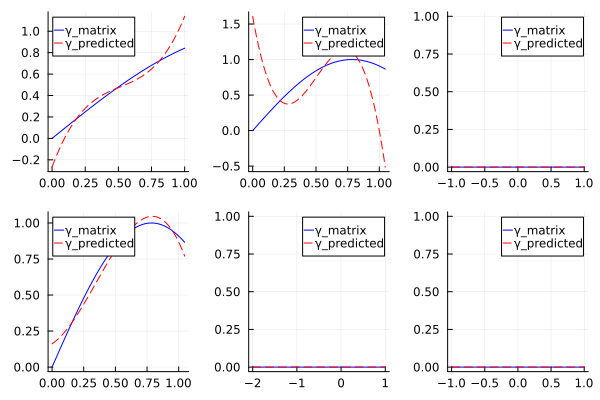

"c:\\Users\\User\\Documents\\repos\\TESI\\tesi_data\\progetto_s_on_f.md\\b_spline\\functional-data-regression-mip\\outputs\\plots\\paper\\combined.png"

In [16]:
project_root = dirname( dirname(@__DIR__))
plot_file_path = joinpath(project_root, "src", "Julia","utils", "plot.jl")

include(plot_file_path)

output_folder= joinpath(project_root, "outputs", "plots", simulation_name)

beta_point_values = output[:beta_point_values]
# plot_combined_predicted_curve(beta_point_values, beta_star,basis_values, time_domains,output_folder, true; upper_bound = UB_M, lower_bound = LB_M)
plot_combined_predicted_curve(beta_point_values, beta_star,basis_values, time_domains,output_folder, true)



In [17]:

using Statistics 
using LinearAlgebra

include(joinpath(project_root, "src", "Julia", "utils", "data_analysis.jl"))

performance_metrics = compute_metrics(Y, Z, beta_matrix, beta_matrix, alpha_star, groups, predictors)


Dict{String, Float64} with 7 entries:
  "RMSE_Coefficients"  => 0.0
  "ISE_Coefficients"   => 0.0
  "MSE_Predictions"    => 0.00169695
  "R_squared"          => 0.999189
  "Adjusted_R_squared" => 0.99918
  "MSE_Coefficients"   => 0.0
  "RMSE_Predictions"   => 0.041194

In [18]:

using Statistics 
using LinearAlgebra

include(joinpath(project_root, "src", "Julia", "utils", "data_analysis.jl"))

performance_metrics = compute_metrics(Y, Z, beta_matrix, beta_star, alpha_star, groups, predictors)


Dict{String, Float64} with 7 entries:
  "RMSE_Coefficients"  => 0.880007
  "ISE_Coefficients"   => 18.5859
  "MSE_Predictions"    => 0.001627
  "R_squared"          => 0.999223
  "Adjusted_R_squared" => 0.999213
  "MSE_Coefficients"   => 0.774412
  "RMSE_Predictions"   => 0.0403361

In [19]:

using Statistics 
using LinearAlgebra

include(joinpath(project_root, "src", "Julia", "utils", "data_analysis.jl"))

performance_metrics = compute_metrics(Y, Z, beta_matrix, beta_ols, alpha_star, groups, predictors)


Dict{String, Float64} with 7 entries:
  "RMSE_Coefficients"  => 0.88358
  "ISE_Coefficients"   => 18.7371
  "MSE_Predictions"    => 0.00160614
  "R_squared"          => 0.999233
  "Adjusted_R_squared" => 0.999224
  "MSE_Coefficients"   => 0.780714
  "RMSE_Predictions"   => 0.0400767